# Herramientas de Visualización y Manejo de Archivos

En este cuaderno, aprenderemos:
1. El uso de **Matplotlib** en Python para generar gráficas (visualización).
2. **Lectura y escritura** de archivos CSV usando **pandas** en Python.
3. Un ejemplo de **lectura de archivos** CSV en C++ usando `fstream`.

Al final, se muestran ejercicios y prácticas recomendadas.

## 1. Visualización con Matplotlib

[Matplotlib](https://matplotlib.org/) es la librería estándar para generar gráficas en Python. Permite crear gráficos de líneas, dispersión (scatter), histogramas, etc.

[Matplotlib Gallery](https://matplotlib.org/stable/gallery/) es una galería extensa de ejemplos con código listo para usar y adaptar.

### Instalación
Si no la tienes instalada, puedes usar el siguiente comando en la terminal:
```bash
$ pip install matplotlib
```

### Ejemplo Básico

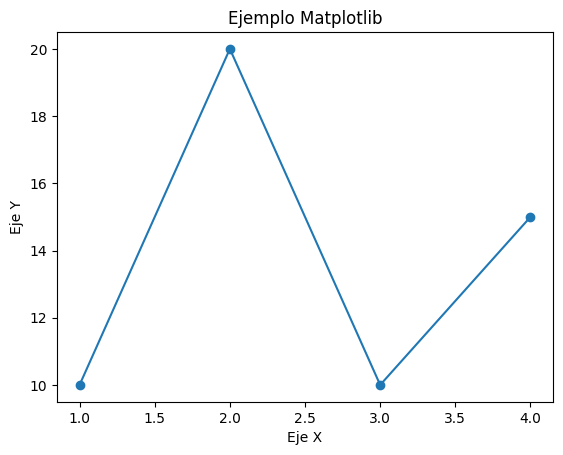

In [3]:
import matplotlib.pyplot as plt

# Datos simples
x = [1, 2, 3, 4]
y = [10, 20, 10, 15]

plt.plot(x, y, marker='o')
plt.title("Ejemplo Matplotlib")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.show()

En el siguiente ejemplo usaremos los datos de células vs. tiempo para generar una gráfica.

## 2. Lectura y escritura de archivos CSV con pandas

[pandas](https://pandas.pydata.org/) facilita la manipulación de datos en Python, incluyendo la **lectura y escritura** de archivos CSV.

### Ejemplo de lectura

In [11]:
import pandas as pd

df = pd.read_csv("datos_crecimiento.csv")  # lee un archivo CSV
print(df.head())

   tiempo_h  Celulas (millones/mL)
0       0.0                   0.10
1       0.5                   0.12
2       1.0                   0.16
3       1.5                   0.20
4       2.0                   0.22


### Ejemplo de escritura

In [2]:
df.to_csv("mi_archivo.csv", index=False)  # escribe un DataFrame a CSV sin la columna de índice

En este cuaderno, crearemos un archivo CSV con los datos de crecimiento celular, lo leeremos con pandas y generaremos una gráfica usando matplotlib.

Archivo 'crecimiento_celular.csv' creado con exito.
Contenido del CSV:
   tiempo_h  celulas_millones
0       0.0              0.10
1       0.5              0.12
2       1.0              0.16
3       1.5              0.20
4       2.0              0.22
5       2.5              0.28
6       3.0              0.37
7       3.5              0.44
8       4.0              0.50
9       4.5              0.65


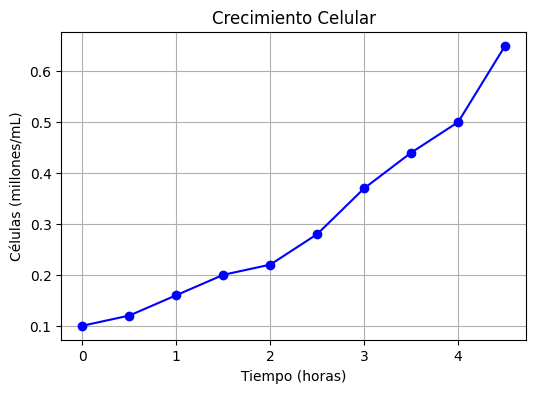

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Crear DataFrame con los datos de la tabla
data = {
    "tiempo_h": [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5],
    "celulas_millones": [0.1, 0.12, 0.16, 0.2, 0.22, 0.28, 0.37, 0.44, 0.5, 0.65]
}
df = pd.DataFrame(data)

# 2) Guardar como CSV
df.to_csv("crecimiento_celular.csv", index=False)
print("Archivo 'crecimiento_celular.csv' creado con exito.")

# 3) Leer el archivo CSV
df_leido = pd.read_csv("crecimiento_celular.csv")
print("Contenido del CSV:")
print(df_leido)

# 4) Graficar usando matplotlib
plt.figure(figsize=(6,4))
plt.plot(df_leido["tiempo_h"], df_leido["celulas_millones"], marker='o', linestyle='-', color='b')
plt.title("Crecimiento Celular")
plt.xlabel("Tiempo (horas)")
plt.ylabel("Células (millones/mL)")
plt.grid(True)
plt.show()

## Gráfica de los datos de crecimiento actualizados

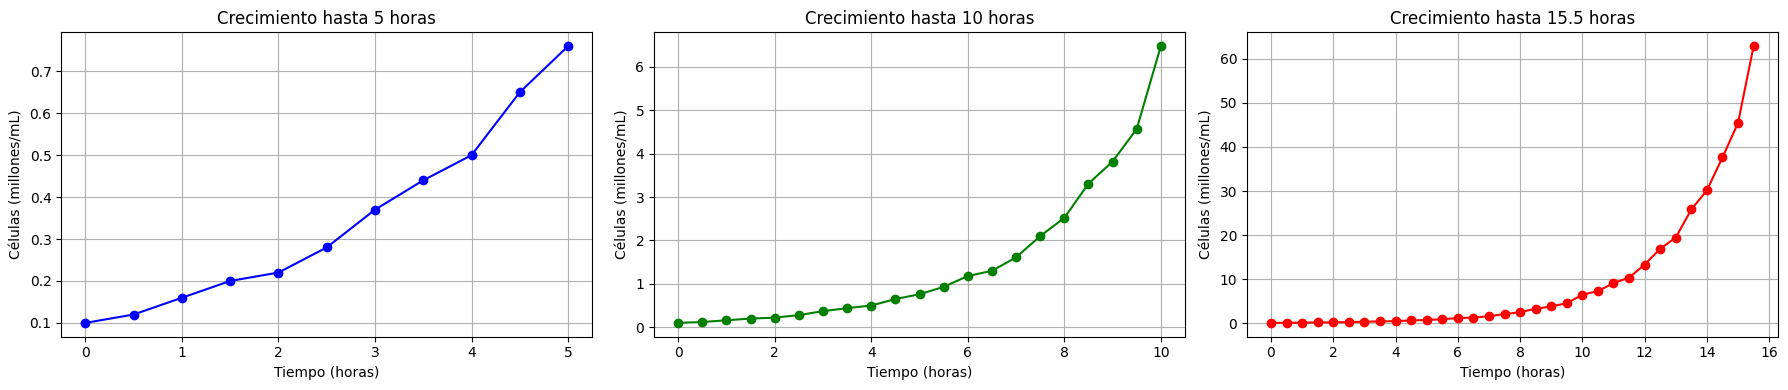

In [14]:

df = pd.read_csv("datos_crecimiento.csv")  # Actualizamos los datos 

# 1) Hacer subconjuntos para cada rango de horas
df_5  = df[df["tiempo_h"] <= 5.0]     # Hasta 5 horas
df_10 = df[df["tiempo_h"] <= 10.0]    # Hasta 10 horas
df_15 = df[df["tiempo_h"] <= 15.5]    # Hasta 15.5 horas (puedes ajustar según necesites)

# 2) Crear una figura con 3 subplots en una sola fila
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

# Primer subplot (hasta 5 horas)
axes[0].plot(df_5["tiempo_h"], df_5["Celulas (millones/mL)"],
             marker='o', linestyle='-', color='b')
axes[0].set_title("Crecimiento hasta 5 horas")
axes[0].set_xlabel("Tiempo (horas)")
axes[0].set_ylabel("Células (millones/mL)")
axes[0].grid(True)

# Segundo subplot (hasta 10 horas)
axes[1].plot(df_10["tiempo_h"], df_10["Celulas (millones/mL)"],
             marker='o', linestyle='-', color='g')
axes[1].set_title("Crecimiento hasta 10 horas")
axes[1].set_xlabel("Tiempo (horas)")
axes[1].set_ylabel("Células (millones/mL)")
axes[1].grid(True)

# Tercer subplot (hasta 15.5 horas)
axes[2].plot(df_15["tiempo_h"], df_15["Celulas (millones/mL)"],
             marker='o', linestyle='-', color='r')
axes[2].set_title("Crecimiento hasta 15.5 horas")
axes[2].set_xlabel("Tiempo (horas)")
axes[2].set_ylabel("Células (millones/mL)")
axes[2].grid(True)

# Ajustar los espacios entre subplots si es necesario
plt.tight_layout()
plt.show()

## 3. Lectura de archivos CSV en C++ (fstream)

En C++, podemos usar la librería `<fstream>` para **leer** archivos de texto, incluyedo CSV. Un ejemplo simple:

```cpp
// LeerCSV.cpp
#include <iostream>
#include <fstream>
#include <string>
#include <sstream>
using namespace std;

int main() {
    ifstream archivo("datos_crecimiento.csv"); // Abrir archivo CSV en modo lectura
    if(!archivo.is_open()) {
        cerr << "No se pudo abrir el archivo\n";
        return 1;
    }

    string linea;
    bool primeraLinea = true;

    /*La función getline regresa un valor booleano que indica si la operación de 
    lectura fue exitosa o no. Esto la hace ideal para usar dentro de un bucle como
     while, ya que permite iterar automáticamente sobre todas las líneas de un 
     archivo o flujo de texto.
     
     istream& getline(istream& is, string& str, char delim = '\n');
is: El flujo de entrada, como un archivo (ifstream), desde el que se leerán los datos.
str: La variable de tipo string donde se almacenará la línea leída.
delim: El carácter delimitador que marca el final de una línea (por defecto, es el carácter de nueva línea '\n').*/

    while(getline(archivo, linea)) {
        // Si queremos ignorar la primera linea (encabezados)
        if(primeraLinea) {
            primeraLinea = false;
            continue;  //Salta a la siguiente iteración del bucle      

        // Partir la linea por comas
        // Ej: "0.0,0.1"
        stringstream ss(linea); // Convierte la línea en un flujo de texto y lo guarada en ss para procesar los valores separados por comas.
        string valorTiempo, valorCel;

        if(getline(ss, valorTiempo, ',') && getline(ss, valorCel, ',')) {
            double tiempo = stod(valorTiempo);
            double celulas = stod(valorCel);

            cout << "Tiempo: " << tiempo 
                 << "\tCelulas (millones/mL): " << celulas << "\n";
        }
    }

    archivo.close();  // Cierra el archivo después de completar su uso, liberando recursos asociados.
    return 0;
}
```

### Explicación
- `std::ifstream archivo("crecimiento_celular.csv");` abre el archivo CSV en modo lectura.
- `getline(archivo, linea)` obtiene cada línea completa del archivo.
- `std::stringstream ss(linea);` crea un **stream** a partir de la línea para poder separar por comas.
- `getline(ss, valorTiempo, ',')` almacena lo que hay antes de la primera coma en `valorTiempo`, etc.
- `std::stod` convierte una cadena a `double`.
- Se imprime en pantalla cada fila con `Tiempo` y `Celulas`.

Así, podremos **leer** los mismos datos que generamos en Python y comprobarlos en C++.

## 4. Escritura de archivos CSV en C++ (fstream)

```cpp
// EscribirCSV.cpp
#include <iostream>
#include <fstream>
#include <string>
#include <vector>
using namespace std;

int main() {
    // Datos de ejemplo a guardar en el CSV
    vector<double> tiempos    = {0.0, 0.5, 1.0, 1.5, 2.0};
    vector<double> concentrac = {0.1, 0.12, 0.16, 0.20, 0.22};

    // Nombre del archivo de salida
    string nombreArchivo = "salida_crecimiento.csv";

    // Crear un ofstream para escritura (modo salida)
    ofstream archivo(nombreArchivo);
    if(!archivo.is_open()) {
        cerr << "No se pudo abrir el archivo para escribir\n";
        return 1;
    }

    // Opcional: Escribir encabezados
    archivo << "tiempo_h,celulas_millones\n";

    // Guardar datos línea por línea
    for(size_t i = 0; i < tiempos.size(); i++) {
        archivo << tiempos[i] << "," << concentrac[i] << "\n";
    }

    // Cerrar el archivo
    archivo.close();

    cout << "Archivo '" << nombreArchivo << "' escrito exitosamente.\n";
    return 0;
}
```

## Ejercicios:
- Usa la implementación que hiciste en la sección de [Regresión Lineal](./RegresiónLineal.md) para predecir el crecimiento del cultivo hasta ya pasada una semana y guarda los datos en un archivo ```prediccion.csv```
- Usa el archivo ```prediccion.csv``` para graficar en python.

## Ejercicios Sugeridos
1. **Modificar Gráfica**: Agrega un color distinto, cambia el tipo de línea o agrega un `marker` diferente en la gráfica de crecimiento celular.
2. **Agregar más columnas**: Edita el CSV para incluir una tercera columna (p. ej. `pH` o `temperatura`) y haz otra gráfica en Python relacionando el tiempo con esa nueva columna.
3. **Leer y Escribir desde Pandas**: Crea un DataFrame con información adicional, escríbelo a un archivo CSV y vuelve a leerlo, confirmando que los datos sean los mismos.
4. **C++**: Edita tu programa para que sume o promedie la columna de células (millones/mL) y muestre el resultado final.